In [86]:
import pandas as pd
import numpy as np
from scipy.optimize import nnls
from scipy.optimize import minimize
from random import choices
import time
import matplotlib. pyplot as plt

In [35]:
def deconvo(A, b , solv):
    
    bounds = []
    for i in range(len(A.columns)):
        bounds.append([0., None])
        
    start_time = time.time()
    
    if solv == "nnls":
        x, rnorm = nnls(A,b)
    
    elif solv == "SLSQP" or solv == "trust-constr": 
        #Use nnls to get initial guess
        x0, rnorm = nnls(A,b)
        #Define minimisation function
        def fn(x, A, b):
            return np.linalg.norm(A.dot(x) - b)

        #Define constraints and bounds
        cons = {'type': 'eq', 'fun': lambda x:  np.sum(x)-1}
        
        #Call minimisation subject to these values
        if solv == "trust-constr":
            minout = minimize(fn, x0, args=(A, b), method='trust-constr',bounds=bounds,constraints=cons)
        else:
            minout = minimize(fn, x0, args=(A, b), method='SLSQP',bounds=bounds,constraints=cons)
    
        x = minout.x
    else:
        raise ValueError("Unkown solver")  
    
    endtime = time.time()
    elapsed_time = (endtime - start_time)
    
    return x, elapsed_time

In [29]:
single_cell = pd.read_csv('Selected_gene_sc.tsv', sep = '\t')
single_cell

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.323555,0.094705,0.192635,0.577982,0.353719,0.128162,0.032882,0.104255,0.600437,0.131016,0.029491,0.132231,0.017921,0.362637,0.036290,0.015385,0.180328,0.076923,0.304348
1,0.000863,0.003055,0.000000,0.000000,0.001653,0.005059,0.001934,0.000000,0.000000,0.005348,0.000000,0.002755,0.853047,0.000000,0.274194,0.558974,0.032787,0.329670,0.000000
2,0.005177,0.006110,0.001416,0.009174,0.009917,0.008432,0.174081,0.002128,0.008734,0.002674,0.439678,0.002755,0.465950,0.014652,0.411290,0.358974,0.038251,0.153846,0.000000
3,0.153581,0.068228,0.264873,0.397554,0.171901,0.178752,0.166344,0.287234,0.257642,0.697861,0.083110,0.228650,0.111111,0.183150,0.032258,0.071795,0.180328,0.087912,0.130435
4,0.006903,1.009165,0.000000,0.000000,0.004959,0.005059,0.000000,0.000000,0.002183,0.002674,0.000000,0.000000,0.007168,0.000000,0.000000,0.000000,0.038251,0.000000,0.065217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,0.993097,0.945010,0.603399,0.749235,0.662810,0.598651,0.843327,0.525532,0.772926,0.548128,1.428954,0.586777,0.544803,0.501832,0.584677,0.707692,0.628415,0.802198,0.782609
2860,0.260569,0.423625,0.120397,0.152905,0.180165,0.139966,0.396518,0.140426,0.213974,0.125668,0.605898,0.195592,0.394265,0.139194,0.334677,0.205128,0.469945,0.164835,0.347826
2861,0.414150,0.120163,0.140227,0.501529,0.198347,0.124789,0.243714,0.306383,0.879913,0.141711,0.233244,0.088154,0.215054,0.461538,0.318548,0.128205,0.229508,0.197802,0.369565
2862,0.053494,0.177189,0.021246,0.079511,0.071074,0.057336,0.334623,0.072340,0.019651,0.136364,0.378016,0.066116,0.136201,0.051282,0.282258,0.076923,0.852459,0.109890,0.043478


In [30]:
bulk = pd.read_csv('Selected_gene_bulk.tsv', sep = '\t')
gene = bulk['id']
bulk_values = bulk.iloc[:,1:]
bulk_values

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110
0,0.272364,0.428677,0.108904,0.282876,0.443393,0.057185,0.277305,0.142332,0.119310,0.257542,...,0.297698,0.227899,0.058972,0.263744,0.202460,0.269000,0.340271,0.127299,0.322611,0.120151
1,0.651938,1.162660,0.593676,0.925709,1.217457,2.514403,1.598007,0.746156,0.639809,0.927875,...,1.868096,0.907949,2.120641,1.265974,2.091835,0.367555,0.927659,1.486896,0.618150,0.629630
2,0.014840,0.020105,0.031594,0.007659,0.001436,0.009095,0.003830,0.029679,0.008617,0.003351,...,0.012446,0.011010,0.359023,0.006223,0.013882,0.008617,0.006702,0.032073,0.005266,0.006702
3,1.094460,1.051771,0.673025,1.704511,0.238874,0.592189,0.517711,1.271269,0.511656,0.376627,...,0.290039,0.355132,0.717227,0.418105,0.392371,0.585226,0.660914,0.913412,1.101726,1.521344
4,0.251093,0.134916,0.502811,0.120550,1.321674,0.080575,0.194878,0.446596,0.178014,1.098064,...,0.108682,0.073704,0.291068,0.623985,0.090568,0.236727,0.069332,0.147408,0.049344,0.047470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,0.291871,0.210932,1.013315,0.321654,0.297828,0.261388,0.401191,0.625088,0.331114,0.351086,...,0.254730,0.332165,0.925368,0.489488,0.287316,0.257884,0.322705,0.389278,0.343378,0.317449
2860,0.021818,0.025455,0.092468,0.021818,0.015584,0.072727,0.021818,0.121039,0.018701,0.017143,...,0.028052,0.011429,0.339221,0.017143,0.012987,0.020260,0.005714,0.058182,0.018701,0.025455
2861,0.084702,0.059421,0.127269,0.057044,0.015774,0.050562,0.047537,0.124244,0.058773,0.029602,...,0.052723,0.031547,0.173509,0.059637,0.058557,0.064823,0.053803,0.103933,0.076707,0.095938
2862,0.036061,0.021267,0.052011,0.023347,0.010402,0.021960,0.020342,0.081600,0.022654,0.014101,...,0.031438,0.018724,0.522191,0.033287,0.033518,0.032825,0.027739,0.044152,0.018955,0.023810


In [33]:
result = deconvo(single_cell, bulk_values.iloc[:,1], "SLSQP")
result

[[0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None], [0.0, None]]


(array([1.28676625e-10, 1.49988121e-18, 1.69424821e-18, 1.00000000e+00,
        7.06079360e-11, 1.06079999e-21, 1.64268598e-12, 1.07084896e-11,
        7.08662605e-18, 5.41043245e-19, 1.19956822e-11, 1.50173762e-11,
        0.00000000e+00, 3.03540803e-11, 6.12373130e-20, 6.57404685e-12,
        1.86267392e-18, 2.47684373e-11, 4.84986495e-11]), 0.08118820190429688)

In [4]:
top20_bulk = pd.read_csv('Top20_marker_bulk.tsv', sep = '\t')
top20_bulk = top20_bulk.iloc[:,1:]

In [57]:
A = single_cell
res = {}
time_t = []
i = 0
for i in range(89):
    b = bulk_values.iloc[:,i]
    
    start_time = time.time()
    #Use nnls to get initial guess
    x0, rnorm = nnls(A,b)
    #print(x0)


    #Define minimisation function
    def fn(x, A, b):
        return np.linalg.norm(A.dot(x) - b)

    #Define constraints and bounds
    cons = {'type': 'eq', 'fun': lambda x:  np.sum(x)-1}
    bounds = [[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None]]

    #Call minimisation subject to these values
    minout = minimize(fn, x0, args=(A, b), method='trust-constr',bounds=bounds,constraints=cons)
    #minout = minimize(fn, x0, args=(A, b), method='SLSQP',bounds=bounds,constraints=cons)
    x = minout.x
    endtime = time.time()
    time_t.append(endtime - start_time)
    res[i] = x,x.sum(),fn(x,A,b)
#print(x,x.sum(),fn(x,A,b))

/home/remi/anaconda3/lib/python3.7/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [21]:
res

{0: array([0.        , 0.19369549, 0.0452374 , 0.        , 0.        ,
        0.        , 0.04275343, 0.1354233 , 1.45576289, 0.        ,
        0.        , 0.        , 0.        , 0.00847753, 0.        ,
        0.        , 1.21514279, 0.        , 0.        ]),
 1: array([0.        , 0.09573408, 0.17578697, 0.        , 0.        ,
        0.        , 0.        , 0.        , 5.00464142, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28459971, 0.        , 0.        ]),
 2: array([0.        , 0.62208442, 0.34313109, 0.        , 0.11410998,
        0.        , 0.        , 0.        , 1.41979492, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.69247775, 0.73982159, 0.        ]),
 3: array([0.        , 0.10806236, 0.17548892, 0.        , 0.02903581,
        0.        , 0.        , 0.        , 1.52948602, 0.        ,
        0.        , 0.        , 0.        , 0.29940234, 0.        

In [17]:
print(len(time_t))
np.mean(time_t)

89


0.035882483707385116

In [64]:
A = no_top_sc

#A = single_cell
res = {}
time_t = []
i = 0
for i in range(89):
    #b = bulk_values.iloc[:,i]
    b = no_top_bulk.iloc[:,i]
    
    start_time = time.time()
    #Use nnls to get initial guess
    x0, rnorm = nnls(A,b)
    endtime = time.time()
    time_t.append(endtime - start_time)
    total = np.sum(x0)
    res[i] = x0/total

In [25]:
print(len(time_t))
np.mean(time_t)

89


0.0014278326141700316

In [65]:
avg = []
i = 0
for i in range(89):
    if i == 0:

        avg = res[i]       
    else:
        for j in range(len(res[i])):
            avg[j] = avg[j]+res[i][j]
            
print(avg)
print(avg/89)
averaged = (avg/89)
sum = 0
for elt in avg:
    sum = sum + (elt/89)
sum

[ 0.          5.91555452  4.60760194  0.07796407  1.24862254  0.
  4.78181857  0.2737423  14.58989744  2.35423836  1.19213744 30.36787913
  0.57296981  1.87676498  1.20929786  0.87511359 14.72624387  4.33015359
  0.        ]
[0.         0.0664669  0.05177081 0.000876   0.01402947 0.
 0.0537283  0.00307576 0.16393143 0.02645212 0.0133948  0.34121213
 0.00643786 0.02108725 0.01358762 0.00983274 0.16546341 0.04865341
 0.        ]


1.0

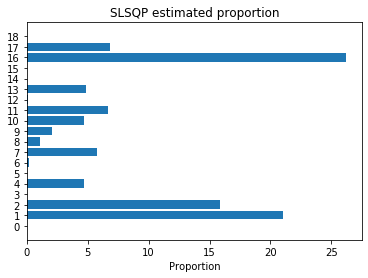

In [73]:
fig, ax = plt.subplots()
y_pos = np.arange(len(averaged))
ax.barh(y_pos, averaged * 100)
ax.set_yticks(y_pos)
ax.set_xlabel('Proportion')
ax.set_title('SLSQP estimated proportion')
#plt.show()
plt.savefig('SLSQP_notop.png')

<Figure size 432x288 with 0 Axes>

In [8]:
top20_sc = pd.read_csv('Top20_marker_sc.tsv', sep = '\t')
top20_bulk = pd.read_csv('Top20_marker_bulk.tsv', sep = '\t')
top20_bulk = top20_bulk.iloc[:,1:]

In [9]:
A = top20_sc
res_top20 = {}
i = 0
for i in range(89):
    b = top20_bulk.iloc[:,i]
    #Use nnls to get initial guess
    x0, rnorm = nnls(A,b)


    #Define minimisation function
    def fn(x, A, b):
        return np.linalg.norm(A.dot(x) - b)

    #Define constraints and bounds
    cons = {'type': 'eq', 'fun': lambda x:  np.sum(x)-1}
    bounds = [[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None]]

    #Call minimisation subject to these values
    minout = minimize(fn, x0, args=(A, b), method='trust-constr',bounds=bounds,constraints=cons)
    #minout = minimize(fn, x0, args=(A, b), method='SLSQP',bounds=bounds,constraints=cons)
    x = minout.x

    res_top20[i] = x,x.sum(),fn(x,A,b)
#print(x,x.sum(),fn(x,A,b))

In [10]:
res_top20

{0: (array([3.69909412e-09, 1.30126297e-01, 7.43657420e-10, 8.69873664e-01,
         7.98762405e-10, 7.59977648e-10, 8.88291142e-10, 8.82122791e-10,
         1.65977906e-08, 7.67498114e-10, 1.57641636e-09, 7.18210291e-10,
         8.91983372e-10, 7.57141249e-10, 7.51150311e-10, 1.12093957e-09,
         2.44254143e-09, 1.25532988e-09, 4.88879053e-09]),
  0.9999999999999999,
  700.3460693228494),
 1: (array([3.77252514e-06, 1.27429178e-06, 1.20587933e-06, 9.99968802e-01,
         1.12101385e-06, 1.15984870e-06, 1.15720814e-06, 1.14892788e-06,
         4.93893534e-06, 1.21681913e-06, 1.15156692e-06, 1.15823211e-06,
         1.14293499e-06, 1.17737228e-06, 1.13841732e-06, 1.13365270e-06,
         1.23085703e-06, 1.20233271e-06, 4.86721216e-06]),
  1.0,
  2606.285947750165),
 2: (array([4.53885302e-10, 3.78166256e-01, 1.11860197e-11, 5.94191255e-01,
         2.76424832e-02, 1.42957067e-10, 1.76680136e-10, 1.69885976e-10,
         2.06117001e-09, 1.46956263e-10, 1.31302464e-10, 1.51376430e-1

In [58]:
avg = []
i = 0
for i in range(89):
    if i == 0:

        avg = res[i][0]       
    else:
        for j in range(len(res[i][0])):
            avg[j] = avg[j]+res[i][0][j]
            
print(avg)
print(avg/89)
averaged = (avg/89)
sum = 0
for elt in avg:
    sum = sum + (elt/89)
sum

[2.17269746e-01 2.29147404e+01 5.76849703e-02 5.30312288e+01
 7.44440355e-01 8.94578876e-03 1.41688537e-02 9.54411229e-03
 8.55184509e+00 1.05042921e-02 1.14184647e-02 1.86222850e-02
 8.76724261e-03 6.55536029e-01 7.96843693e-03 9.32484011e-03
 2.36239486e+00 4.31046755e-02 3.22490741e-01]
[2.44123310e-03 2.57468993e-01 6.48145734e-04 5.95856504e-01
 8.36449838e-03 1.00514480e-04 1.59200604e-04 1.07237217e-04
 9.60881471e-02 1.18025754e-04 1.28297356e-04 2.09239158e-04
 9.85083440e-05 7.36557336e-03 8.95329992e-05 1.04773484e-04
 2.65437625e-02 4.84322197e-04 3.62349148e-03]


0.9999999999999782

In [12]:
avg_top20=[]
i=0
for i in range(89):
    print(i)
    if i == 0:
        print(res_top20[i][0])
        avg_top20 = res_top20[i][0]
    else:
        j = 0
        for j in range(len(res_top20[i][0])):
            print(res_top20[i][0][j])
            avg_top20[j] = avg_top20[j]+ res_top20[i][0][j]
    print(avg_top20)

print(avg_top20)
print(avg_top20/89)
sum=0
for elt in avg_top20:
    sum=sum + (elt/89)
sum

0
[3.69909412e-09 1.30126297e-01 7.43657420e-10 8.69873664e-01
 7.98762405e-10 7.59977648e-10 8.88291142e-10 8.82122791e-10
 1.65977906e-08 7.67498114e-10 1.57641636e-09 7.18210291e-10
 8.91983372e-10 7.57141249e-10 7.51150311e-10 1.12093957e-09
 2.44254143e-09 1.25532988e-09 4.88879053e-09]
[3.69909412e-09 1.30126297e-01 7.43657420e-10 8.69873664e-01
 7.98762405e-10 7.59977648e-10 8.88291142e-10 8.82122791e-10
 1.65977906e-08 7.67498114e-10 1.57641636e-09 7.18210291e-10
 8.91983372e-10 7.57141249e-10 7.51150311e-10 1.12093957e-09
 2.44254143e-09 1.25532988e-09 4.88879053e-09]
1
3.7725251388152152e-06
1.2742917828831173e-06
1.2058793302590785e-06
0.9999688019724824
1.121013851563954e-06
1.159848696319688e-06
1.157208144211375e-06
1.148927883508449e-06
4.938935340228562e-06
1.2168191287662877e-06
1.1515669188637718e-06
1.158232108401122e-06
1.1429349856078544e-06
1.1773722806591883e-06
1.1384173208231467e-06
1.1336526958157587e-06
1.2308570344724633e-06
1.2023327141421594e-06
4.86721216

1.0000000000000382

In [27]:
sorted_bulk = bulk_values.sort_values(by = "X1", ascending=False)
sorted_sc = single_cell.reindex(sorted_bulk.index)

In [28]:
no_top_sc = sorted_sc.iloc[10:,:]
no_top_bulk = sorted_bulk.iloc[10:,:]

In [71]:
A = no_top_sc
res_no_top = {}
i = 0
for i in range(89):
    b = no_top_bulk.iloc[:,i]
    #Use nnls to get initial guess
    x0, rnorm = nnls(A,b)


    #Define minimisation function
    def fn(x, A, b):
        return np.linalg.norm(A.dot(x) - b)

    #Define constraints and bounds
    cons = {'type': 'eq', 'fun': lambda x:  np.sum(x)-1}
    bounds = [[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None]]

    #Call minimisation subject to these values
    #minout = minimize(fn, x0, args=(A, b), method='trust-constr',bounds=bounds,constraints=cons)
    minout = minimize(fn, x0, args=(A, b), method='SLSQP',bounds=bounds,constraints=cons)
    x = minout.x

    res_no_top[i] = x,x.sum(),fn(x,A,b)
#print(x,x.sum(),fn(x,A,b))

In [16]:
res_no_top

{0: (array([4.70352668e-08, 5.17493240e-02, 8.98038685e-03, 2.92434615e-08,
         6.51577529e-03, 6.72361331e-08, 3.60200467e-07, 2.24941832e-01,
         5.33906745e-08, 3.82570379e-02, 2.30938192e-01, 1.15273224e-07,
         2.79913715e-08, 2.18624600e-02, 1.51960104e-08, 2.36093123e-08,
         4.15070012e-01, 1.68419821e-03, 4.36427706e-08]),
  1.0000000000000002,
  293.61766300923495),
 1: (array([2.74189845e-08, 3.51295772e-08, 1.52791083e-01, 3.90121976e-08,
         1.14982220e-02, 2.57874292e-08, 1.54368565e-08, 1.30093734e-07,
         8.48379649e-02, 6.10067783e-01, 1.52186834e-08, 2.35704381e-08,
         1.38919742e-08, 8.24776333e-03, 9.47299788e-09, 1.20370305e-08,
         1.32556789e-01, 1.83877620e-08, 2.97559877e-08]),
  0.9999999999999987,
  307.6921722991178),
 2: (array([0.0032229 , 0.35567703, 0.19740168, 0.00246164, 0.13646221,
         0.00475291, 0.00366106, 0.00370242, 0.0026706 , 0.0059641 ,
         0.00450408, 0.00360618, 0.00336586, 0.00339677, 0.002

In [72]:
avg_no_top = []
i = 0
for i in range(89):
    if i == 0:
        avg_no_top = res_no_top[i][0]
    else:
        for j in range(len(res_no_top[i][0])):
            avg_no_top[j] = avg_no_top[j]+ res_no_top[i][0][j]

print(avg_no_top)
print(avg_no_top/89)
averaged = (avg_no_top/89)
sum = 0
for elt in avg_no_top:
    sum = sum + (elt/89)
sum

[1.87470978e-10 1.87358530e+01 1.40935593e+01 2.70098898e-10
 4.16756736e+00 1.56774858e-10 1.24770797e-01 5.10951654e+00
 9.77170617e-01 1.85281996e+00 4.16668305e+00 5.94507803e+00
 9.72039218e-02 4.33583889e+00 2.00598252e-10 1.27102828e-10
 2.33169022e+01 6.07703640e+00 2.72728738e-10]
[2.10641549e-12 2.10515203e-01 1.58354598e-01 3.03481908e-12
 4.68265995e-02 1.76151526e-12 1.40191907e-03 5.74102982e-02
 1.09794451e-02 2.08182018e-02 4.68166634e-02 6.67986296e-02
 1.09217890e-03 4.87172909e-02 2.25391295e-12 1.42812166e-12
 2.61987665e-01 6.82813078e-02 3.06436785e-12]


1.00000000006409

In [172]:
meta = pd.read_csv('dataset/meta_data_h2', sep = '\t')
meta

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters
0,human2_lib1.final_cell_0001,human2,9323,2267,5641,2044,5,5
1,human2_lib1.final_cell_0002,human2,6732,1632,5399,1627,5,5
2,human2_lib1.final_cell_0003,human2,10762,2815,5738,2357,0,0
3,human2_lib1.final_cell_0004,human2,8546,2366,5611,2264,5,5
4,human2_lib1.final_cell_0005,human2,8651,2331,5607,2204,5,5
...,...,...,...,...,...,...,...,...
1719,human2_lib3.final_cell_0561,human2,1571,933,3696,1073,7,7
1720,human2_lib3.final_cell_0562,human2,1703,827,3891,936,10,10
1721,human2_lib3.final_cell_0563,human2,1447,859,3639,1031,6,6
1722,human2_lib3.final_cell_0564,human2,1514,800,3734,955,10,10


In [43]:
rand_index = choices(range(len(meta['Unnamed: 0'])),k=1000)

In [130]:
rand_cells = meta.iloc[rand_index,0]
rand_cells

1252    human2_lib3.final_cell_0094
222     human2_lib1.final_cell_0223
1222    human2_lib3.final_cell_0064
1486    human2_lib3.final_cell_0328
771     human2_lib2.final_cell_0213
                   ...             
287     human2_lib1.final_cell_0288
1386    human2_lib3.final_cell_0228
359     human2_lib1.final_cell_0360
1517    human2_lib3.final_cell_0359
284     human2_lib1.final_cell_0285
Name: Unnamed: 0, Length: 1000, dtype: object

In [46]:
sc_raw = pd.read_csv('dataset/treated_h2_data', sep = '\t')
full_gene = sc_raw['Unnamed: 0']
sc_raw

,Unnamed: 0,human2_lib1.final_cell_0001,human2_lib1.final_cell_0002,human2_lib1.final_cell_0003,human2_lib1.final_cell_0004,human2_lib1.final_cell_0005,human2_lib1.final_cell_0006,human2_lib1.final_cell_0007,human2_lib1.final_cell_0008,human2_lib1.final_cell_0009,...,human2_lib3.final_cell_0556,human2_lib3.final_cell_0557,human2_lib3.final_cell_0558,human2_lib3.final_cell_0559,human2_lib3.final_cell_0560,human2_lib3.final_cell_0561,human2_lib3.final_cell_0562,human2_lib3.final_cell_0563,human2_lib3.final_cell_0564,human2_lib3.final_cell_0565
0,A1BG,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,1.098612,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,A1CF,0.000000,1.098612,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,...,0.0,0.0,1.098612,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,1.098612,0.000000,0.0,0.000000,0.0
3,A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.098612,0.0
4,AAAS,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,ZYG11B,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
14193,ZYX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,...,0.0,0.0,0.000000,1.098612,0.0,0.000000,1.098612,0.0,1.098612,0.0
14194,ZZEF1,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,1.098612,0.000000,0.0,0.000000,0.0
14195,ZZZ3,0.000000,1.098612,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [125]:
rand_counts = sc_raw.loc[:,rand_cells]
rand_counts

,human2_lib3.final_cell_0094,human2_lib1.final_cell_0223,human2_lib3.final_cell_0064,human2_lib3.final_cell_0328,human2_lib2.final_cell_0213,human2_lib2.final_cell_0157,human2_lib2.final_cell_0088,human2_lib3.final_cell_0121,human2_lib1.final_cell_0298,human2_lib1.final_cell_0347,...,human2_lib1.final_cell_0338,human2_lib1.final_cell_0196,human2_lib2.final_cell_0481,human2_lib1.final_cell_0076,human2_lib2.final_cell_0058,human2_lib1.final_cell_0288,human2_lib3.final_cell_0228,human2_lib1.final_cell_0360,human2_lib3.final_cell_0359,human2_lib1.final_cell_0285
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.693147,0.0,0.000000,0.000000,0.0,0.000000,1.386294,0.0,0.0,0.000000,...,0.000000,0.693147,0.0,0.693147,0.000000,0.693147,0.0,0.693147,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.693147,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.000000,...,0.000000,0.693147,0.0,0.000000,0.693147,0.000000,0.0,0.000000,0.693147,0.693147
14193,0.000000,0.0,0.000000,0.000000,0.0,1.098612,0.000000,0.0,0.0,2.197225,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
14194,0.693147,0.0,0.000000,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.000000,...,0.693147,0.000000,0.0,0.693147,0.693147,1.098612,0.0,0.000000,0.000000,0.693147
14195,0.693147,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [48]:
sum_rand_counts = rand_counts.sum(axis=1)
sum_rand_counts

0          3.583519
1        189.614146
2         58.462186
3         37.143394
4        108.394757
            ...    
14192    157.724861
14193    277.375323
14194    116.763510
14195     61.076170
14196     72.624106
Length: 14197, dtype: float64

In [49]:
full_gene_sum = pd.concat([full_gene, sum_rand_counts], axis=1)
full_gene_sum

,Unnamed: 0,0
0,A1BG,3.583519
1,A1CF,189.614146
2,A2M,58.462186
3,A4GALT,37.143394
4,AAAS,108.394757
...,...,...
14192,ZYG11B,157.724861
14193,ZYX,277.375323
14194,ZZEF1,116.763510
14195,ZZZ3,61.076170


In [60]:
single_cell_h2 = pd.read_csv('dataset/selected_genes_sc_h2', sep = '\t')
h2_gene = single_cell_h2['Unnamed: 0']
single_cell_h2_values = single_cell_h2.iloc[:,1:]
single_cell_h2_values

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.625430,0.567944,0.110553,0.110465,0.061069,0.496063,0.068627,0.020202,0.322222,0.000000,0.359375,0.380952,0.000000
1,0.003436,0.000000,0.005025,0.005814,0.000000,0.000000,0.029412,1.393939,0.000000,0.026316,0.125000,0.000000,0.869565
2,0.006873,0.013937,0.000000,0.005814,0.152672,0.000000,0.039216,0.575758,0.000000,0.026316,0.125000,0.000000,0.521739
3,0.422680,0.414634,0.653266,0.767442,0.236641,0.212598,0.196078,0.191919,0.300000,0.078947,0.421875,0.174603,0.043478
4,0.219931,0.317073,0.547739,0.831395,0.129771,0.259843,0.088235,0.020202,0.233333,0.184211,0.093750,0.365079,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,0.120275,0.167247,0.145729,0.116279,0.312977,0.228346,0.568627,0.383838,0.122222,0.592105,0.156250,0.206349,0.347826
2569,0.553265,0.564460,0.683417,0.703488,0.610687,0.629921,0.686275,1.121212,0.811111,1.486842,0.828125,0.698413,1.043478
2570,0.113402,0.160279,0.185930,0.220930,0.633588,0.133858,0.362745,0.454545,0.222222,0.276316,0.171875,0.126984,0.521739
2571,0.079038,0.087108,0.115578,0.261628,0.541985,0.173228,1.274510,0.252525,0.033333,0.328947,0.140625,0.031746,0.173913


In [61]:
select_gene_h2_sum = full_gene_sum[full_gene_sum['Unnamed: 0'].isin(h2_gene)]
select_gene_h2_sum

,Unnamed: 0,0
1,A1CF,189.614146
2,A2M,58.462186
3,A4GALT,37.143394
5,AACS,206.956545
28,ABCA3,202.377348
...,...,...
14106,ZNF787,135.050431
14142,ZNF90,403.544172
14146,ZNFX1,153.226180
14181,ZSWIM4,82.507606


In [62]:
rand_clust = meta.iloc[rand_index,7]
rand_clust

1252    0
222     2
1222    6
1486    4
771     2
       ..
287     2
1386    0
359     1
1517    0
284     2
Name: seurat_clusters, Length: 1000, dtype: int64

In [63]:
clust_sum = rand_clust.value_counts()
clust_total = clust_sum.sum()
clust_true_prop = (clust_sum/clust_total) * 100
print(clust_true_prop)
sum(clust_true_prop)

0     18.5
1     15.5
2     11.4
3      9.6
4      7.7
5      6.5
7      6.0
8      5.6
6      5.6
10     4.5
9      4.1
11     3.3
12     1.7
Name: seurat_clusters, dtype: float64


99.99999999999999

In [64]:
#single_cell_h1_values = single_cell_h1_values.fillna(0)
np.isnan(single_cell_h2_values).any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool

In [55]:
np.isinf(single_cell_h2_values).any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

In [65]:

select_gene_h2_sum_values = select_gene_h2_sum.iloc[:,1]
np.isnan(select_gene_h2_sum_values).any()
#select_gene_h1_sum_values = select_gene_h1_sum_values.fillna(0)

False

In [17]:
np.isinf(select_gene_h1_sum_values).all()

False

In [18]:
np.isfinite(select_gene_h1_sum_values).any()

True

In [19]:
np.isfinite(single_cell_h1_values).any()

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
dtype: bool

In [98]:
select_gene_h2_sum_values

1        189.614146
2         58.462186
3         37.143394
5        206.956545
28       202.377348
            ...    
14106    135.050431
14142    403.544172
14146    153.226180
14181     82.507606
14193    277.375323
Name: 0, Length: 2573, dtype: float64

In [21]:
A = single_cell_h1_values
b = select_gene_h1_sum_values
#Use nnls to get initial guess
x0, rnorm = nnls(A,b)
#x0 = [0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076]
#x0 = clust_true_prop
print(x0)

#Define minimisation function
def fn(x, A, b):
    return np.linalg.norm(A.dot(x) - b)

#Define constraints and bounds
cons = {'type': 'eq', 'fun': lambda x:  np.sum(x)-1}
bounds = [[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None],[0., None]]

#Call minimisation subject to these values
minout = minimize(fn, x0, args=(A, b), method='trust-constr',bounds=bounds,constraints=cons)
x = minout.x

res_simu = x,x.sum(),fn(x,A,b)
#print(x,x.sum(),fn(x,A,b))

[ 0.          0.          0.         14.78189549  5.69849105  0.
 33.4176153   4.6530612   1.5508649  24.93993307  0.8196517  66.87089251
 13.2758181   3.75281956]


ValueError: array must not contain infs or NaNs

In [87]:
A = single_cell_h2_values
b = select_gene_h2_sum_values
x, res_time = deconvo(A, b, "nnls") 

In [88]:
x

array([ 0.        ,  3.20482591,  0.        , 22.68561391, 52.5014769 ,
        0.        ,  0.79933752,  6.54661499,  1.77995344, 38.7038265 ,
       10.19269926,  0.        , 45.42494753])

In [22]:
res_simu

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]), nan, nan)

In [55]:
x0

array([ 0.        ,  0.        ,  0.        , 15.32517653,  7.90043951,
        0.        , 34.07325123,  4.58532912,  1.52257071, 24.45817138,
        0.        , 66.415074  , 11.16619375,  4.23806176])

In [89]:
i = 0
prct = []
tot = np.sum(x)
for elt in x:
    prct.append((elt/tot)*100)
    i = i+1
for i in range(len(prct)):
    print("cluster "+str(i)+": "+str(prct[i])+"%")
print(np.sum(prct))
print("\n"+str(clust_true_prop))

cluster 0: 0.0%
cluster 1: 1.7624495799100475%
cluster 2: 0.0%
cluster 3: 12.47563888239054%
cluster 4: 28.872459400259622%
cluster 5: 0.0%
cluster 6: 0.4395845882634145%
cluster 7: 3.6002201600704824%
cluster 8: 0.9788607175192772%
cluster 9: 21.28463283885755%
cluster 10: 5.605333660271788%
cluster 11: 0.0%
cluster 12: 24.98082017245729%
100.0

0     18.5
1     15.5
2     11.4
3      9.6
4      7.7
5      6.5
7      6.0
8      5.6
6      5.6
10     4.5
9      4.1
11     3.3
12     1.7
Name: seurat_clusters, dtype: float64


In [100]:
sorted_simu = select_gene_h2_sum_values.sort_values(ascending=False)
sorted_sc_h2 = single_cell_h2_values.set_index(sorted_simu.index)

In [97]:
sorted_simu

3601     3500.284080
4715     3356.410587
12854    3154.919313
4885     3118.774379
10232    2894.968177
            ...     
4877        3.465736
4706        3.465736
7898        2.197225
6411        1.386294
9723        0.693147
Name: 0, Length: 2573, dtype: float64

In [101]:
sorted_sc_h2

,0,1,2,3,4,5,6,7,8,9,10,11,12
3601,0.625430,0.567944,0.110553,0.110465,0.061069,0.496063,0.068627,0.020202,0.322222,0.000000,0.359375,0.380952,0.000000
4715,0.003436,0.000000,0.005025,0.005814,0.000000,0.000000,0.029412,1.393939,0.000000,0.026316,0.125000,0.000000,0.869565
12854,0.006873,0.013937,0.000000,0.005814,0.152672,0.000000,0.039216,0.575758,0.000000,0.026316,0.125000,0.000000,0.521739
4885,0.422680,0.414634,0.653266,0.767442,0.236641,0.212598,0.196078,0.191919,0.300000,0.078947,0.421875,0.174603,0.043478
10232,0.219931,0.317073,0.547739,0.831395,0.129771,0.259843,0.088235,0.020202,0.233333,0.184211,0.093750,0.365079,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0.120275,0.167247,0.145729,0.116279,0.312977,0.228346,0.568627,0.383838,0.122222,0.592105,0.156250,0.206349,0.347826
4706,0.553265,0.564460,0.683417,0.703488,0.610687,0.629921,0.686275,1.121212,0.811111,1.486842,0.828125,0.698413,1.043478
7898,0.113402,0.160279,0.185930,0.220930,0.633588,0.133858,0.362745,0.454545,0.222222,0.276316,0.171875,0.126984,0.521739
6411,0.079038,0.087108,0.115578,0.261628,0.541985,0.173228,1.274510,0.252525,0.033333,0.328947,0.140625,0.031746,0.173913


In [112]:
no_top_sc_h2 = sorted_sc_h2.iloc[40:,:]
no_top_simu = sorted_simu.iloc[40:]

In [103]:
no_top_sc_h2

,0,1,2,3,4,5,6,7,8,9,10,11,12
10232,0.219931,0.317073,0.547739,0.831395,0.129771,0.259843,0.088235,0.020202,0.233333,0.184211,0.093750,0.365079,0.130435
1078,0.006873,0.027875,0.005025,0.000000,1.312977,0.000000,1.000000,0.010101,0.000000,0.289474,0.140625,0.000000,0.000000
10213,1.484536,2.689895,7.085427,13.436047,0.213740,2.606299,0.117647,0.333333,3.133333,0.157895,1.265625,2.031746,0.130435
10225,0.340206,0.348432,0.241206,0.325581,0.404580,0.267717,0.558824,0.424242,0.344444,0.592105,0.328125,0.380952,0.782609
12605,0.474227,0.655052,0.105528,0.180233,0.083969,0.023622,0.107843,0.111111,0.211111,0.052632,0.078125,0.492063,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0.120275,0.167247,0.145729,0.116279,0.312977,0.228346,0.568627,0.383838,0.122222,0.592105,0.156250,0.206349,0.347826
4706,0.553265,0.564460,0.683417,0.703488,0.610687,0.629921,0.686275,1.121212,0.811111,1.486842,0.828125,0.698413,1.043478
7898,0.113402,0.160279,0.185930,0.220930,0.633588,0.133858,0.362745,0.454545,0.222222,0.276316,0.171875,0.126984,0.521739
6411,0.079038,0.087108,0.115578,0.261628,0.541985,0.173228,1.274510,0.252525,0.033333,0.328947,0.140625,0.031746,0.173913


In [113]:
x, res_time = deconvo(no_top_sc_h2, no_top_simu, 'nnls')

In [114]:
i = 0
prct = []
tot = np.sum(x)
for elt in x:
    prct.append((elt/tot)*100)
    i = i+1
for i in range(len(prct)):
    print("cluster "+str(i)+": "+str(prct[i])+"%")
print(np.sum(prct))
print("\n"+str(clust_true_prop))

cluster 0: 0.0%
cluster 1: 0.0%
cluster 2: 0.0%
cluster 3: 1.137855564786811%
cluster 4: 56.593811580320576%
cluster 5: 0.0%
cluster 6: 0.10196515481357027%
cluster 7: 7.309459963375136%
cluster 8: 0.08196335183518189%
cluster 9: 0.0%
cluster 10: 0.0%
cluster 11: 0.0%
cluster 12: 34.774944384868725%
100.0

0     18.5
1     15.5
2     11.4
3      9.6
4      7.7
5      6.5
7      6.0
8      5.6
6      5.6
10     4.5
9      4.1
11     3.3
12     1.7
Name: seurat_clusters, dtype: float64


In [121]:
c0 = meta[meta['seurat_clusters'] == 0]
c0['Unnamed: 0']

2       human2_lib1.final_cell_0003
21      human2_lib1.final_cell_0022
25      human2_lib1.final_cell_0026
40      human2_lib1.final_cell_0041
46      human2_lib1.final_cell_0047
                   ...             
1696    human2_lib3.final_cell_0538
1702    human2_lib3.final_cell_0544
1706    human2_lib3.final_cell_0548
1714    human2_lib3.final_cell_0556
1723    human2_lib3.final_cell_0565
Name: Unnamed: 0, Length: 291, dtype: object

In [131]:
c0_values = sc_raw.loc[:,c0['Unnamed: 0']]
c0_values

,human2_lib1.final_cell_0003,human2_lib1.final_cell_0022,human2_lib1.final_cell_0026,human2_lib1.final_cell_0041,human2_lib1.final_cell_0047,human2_lib1.final_cell_0048,human2_lib1.final_cell_0052,human2_lib1.final_cell_0055,human2_lib1.final_cell_0059,human2_lib1.final_cell_0064,...,human2_lib3.final_cell_0489,human2_lib3.final_cell_0499,human2_lib3.final_cell_0504,human2_lib3.final_cell_0514,human2_lib3.final_cell_0536,human2_lib3.final_cell_0538,human2_lib3.final_cell_0544,human2_lib3.final_cell_0548,human2_lib3.final_cell_0556,human2_lib3.final_cell_0565
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.693147,0.0,1.098612,1.098612,0.0,0.000000,0.693147,1.098612,0.693147,0.000000,...,1.386294,1.386294,0.693147,0.000000,0.0,0.0,1.098612,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.0,1.098612,0.000000,1.098612,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,0.000000,0.0,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.693147,...,0.000000,0.000000,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0
14193,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
14194,0.000000,0.0,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.098612,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
14195,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [133]:
c0_values.mean(axis = 1)

0        0.002382
1        0.362601
2        0.002382
3        0.003775
4        0.110523
           ...   
14192    0.135008
14193    0.102428
14194    0.072673
14195    0.050426
14196    0.004764
Length: 14197, dtype: float64

In [141]:
for i in A.columns:
    b = A[i]
    x, restime = deconvo(A,b , 'nnls')
    print(x)

[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.77039150e-20 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.31702749e-15
 0.00000000e+00]
[3.69123562e-17 1.00000000e+00 0.00000000e+00 1.74255418e-18
 0.00000000e+00 3.92983430e-20 0.00000000e+00 2.46706843e-18
 0.00000000e+00 0.00000000e+00 2.02785782e-18 8.78018329e-16
 5.34733387e-18]
[0.00000000e+00 5.21405572e-19 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.23611921e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[7.77288906e-17 2.26817168e-18 0.00000000e+00 5.46432908e-19
 1.00000000e+00 0.00000000e+00 2.91447756e-16 0.00000000e+00
 2.93382609e-21 4.67408784e-18 0.00000000e+00 6.94781069e-19
 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.40070929e-17 0.0000

array([0.00000000e+00, 5.21405572e-19, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.23611921e-19, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [158]:
def rand_bulk(meta, raw_sc_data, kcell, rand_index = None):
    # random selection of kcell index
    if rand_index == None:
        rand_index = choices(range(len(meta.iloc[:, 0])), k = kcell)
    
    
    # obtention of selected cell names
    rand_cells = meta.iloc[rand_index,0]
    
    # subsetting of the kcell cells
    rand_expr = raw_sc_data.loc[:,rand_cells]
    
    # Suming values
    sum_rand_expr = rand_expr.sum(axis=1)
    
    # Rematching with gene names 
    gene_names = raw_sc_data.iloc[:, 0]
    simu_bulk = pd.concat([gene_names, sum_rand_counts], axis=1)
    
    ## Calculating true prop
    # obtention of selected cell clusters
    rand_clust = meta.iloc[rand_index,7]
    # Summing values
    clust_sum = rand_clust.value_counts()
    # Obtaining proportions
    clust_true_prop = (clust_sum/kcell) * 100

    return simu_bulk, clust_true_prop
    
def intersect(simu_bulk, sc_avg_data):
    ## Adjusting sc_avg_data and simulated bulk
    # separating into gene names and values 
    sc_avg_gene = sc_avg_data.iloc[:, 0]
    sc_avg_expr = sc_avg_data.iloc[:,1:]
    # subsetting simu bulk data
    sub_simu_bulk = simu_bulk[simu_bulk.iloc[:,0].isin(sc_avg_gene)]
    
    return sub_simu_bulk.iloc[:,1], sc_avg_expr

In [159]:
simu_bulk_h2, true_prop = rand_bulk(meta,sc_raw, 1000)

In [151]:
A, b = intersect(simu_bulk_h2, single_cell_h2)

In [198]:
def rand_subset(meta, sc_raw_data, kcell, pops):
    
    # calculating proportion for each pop
    parts = len(pops)
    goal = kcell
    prop = []
    
    for i in range(parts - 1):
        selected_numb = random.randrange(goal)
        prop.append(selected_numb)
        goal = goal - selected_numb 
    prop.append(goal)
    
    # selecting those cells
    i = 0
    selected_cells_index = []
    for pop in pops:
        cell_of_pop = meta[meta['seurat_clusters'] == pop].iloc[:, 0]
        selected_cells_index = selected_cells_index + (choices(cell_of_pop.index, k = prop[i]))
        i = i+1

    simu_bulk, true_prop = rand_bulk(meta, sc_raw_data, kcell, selected_cells_index)
    return simu_bulk, true_prop

In [199]:
simu_bulk, true_prop = rand_subset(meta, sc_raw, 1000, [0])

In [201]:
simu_bulk

,Unnamed: 0,0
0,A1BG,3.583519
1,A1CF,189.614146
2,A2M,58.462186
3,A4GALT,37.143394
4,AAAS,108.394757
...,...,...
14192,ZYG11B,157.724861
14193,ZYX,277.375323
14194,ZZEF1,116.763510
14195,ZZZ3,61.076170
